In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

plt.rcdefaults()

# This determines whether we should ask CAMB to recompute all of the CL power
# spectra. This should be True if CL is updated or the file
# "model_ratios_battery.npy" doesn't exist.
regenerate=False

In [2]:
from cassL import camb_interface as ci
from cassL import utils

In [3]:
omega_index = 1 # while we debug, we confine our attention to just one value
onh2 = ci.OMNUH2_FLOATS[omega_index]
onh2_str = ci.OMNUH2_STRS[omega_index]

In [4]:
# Axe the 0.01 value since Ariel has not tested that one in the shared results
#spectra.define_powernu()
#spectra.define_powernu2()
powernu3 = ci.load_benchmark(
    "../../power_nu3/Aletheia_powernu3_zorig_nu",
    ["0.0006", "0.0021", "0.0064", "0.0100"] 
)

In [5]:
ci.OMNUH2_FLOATS = ci.OMNUH2_FLOATS[:(len(ci.OMNUH2_FLOATS) - 1)]
ci.OMNUH2_STRS = ci.OMNUH2_STRS[:(len(ci.OMNUH2_STRS) - 1)]

In [6]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
if regenerate:
    spec_sims = ci.boltzmann_battery(ci.OMNUH2_FLOATS,
        skips_omega = [0, 3], skips_model=[8], skips_snapshot=[1, 2, 3],
        hubble_units=False)
    np.save("model_ratios_battery.npy", spec_sims)
else:
    spec_sims = np.load("model_ratios_battery.npy", allow_pickle=True).item()

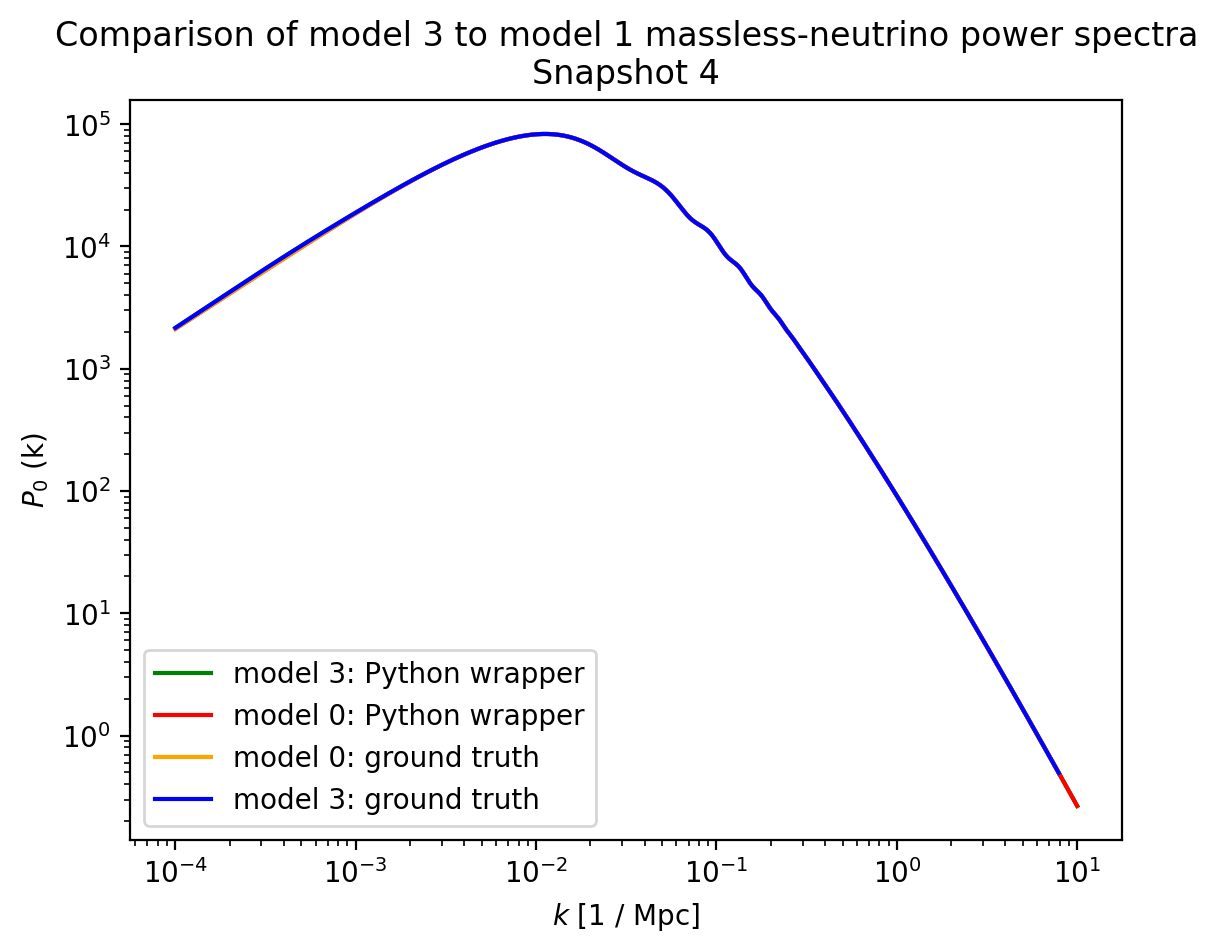

In [7]:
modeli = 3
snapi = 4

sim = spec_sims[onh2][0][snapi]
baseline_h = ci.cosm.loc[0]["h"]
baseline_k = sim["k"]
#baseline_p = p_massless_list[0][z_index] / baseline_h ** 3
baseline_p = sim["P_no"]

sim = spec_sims[onh2][modeli][snapi]
this_h = ci.cosm.loc[modeli]["h"]
this_k = sim["k"]
#this_p = p_massless_list[modeli][z_index] / this_h ** 3
this_p = sim["P_no"]

truncated_k, truncated_p, aligned_p = \
    utils.truncator(baseline_k, baseline_p, this_k, this_p)

true_baseline = powernu3[onh2_str][0][snapi]
baseline_k_true = true_baseline["k"]
baseline_p_true = true_baseline["P_no"]

true_this = powernu3[onh2_str][modeli][snapi]
this_k_true = true_this["k"]
this_p_true = true_this["P_no"]

plt.plot(truncated_k, aligned_p, c="green", label="model 3: Python wrapper")
plt.plot(truncated_k, truncated_p, c="red", label="model 0: Python wrapper")
plt.plot(baseline_k_true, baseline_p_true, c="orange",
         label="model 0: ground truth")
plt.plot(this_k_true, this_p_true, c="blue", label="model 3: ground truth")
plt.title("Model " + str(modeli) + " and model 0 massless-neutrino" + \
          " power spectra\nSnapshot " + str(snapi))
plt.ylabel(r"$P_0$ (k)")
plt.title("Comparison of model " + str(modeli) + " to model 1" + \
          " massless-neutrino power spectra\nSnapshot " + str(snapi))
plt.xlabel(r"$k$ [1 / Mpc]")
plt.xscale("log")
plt.yscale("log")
plt.legend()

del modeli, snapi, sim

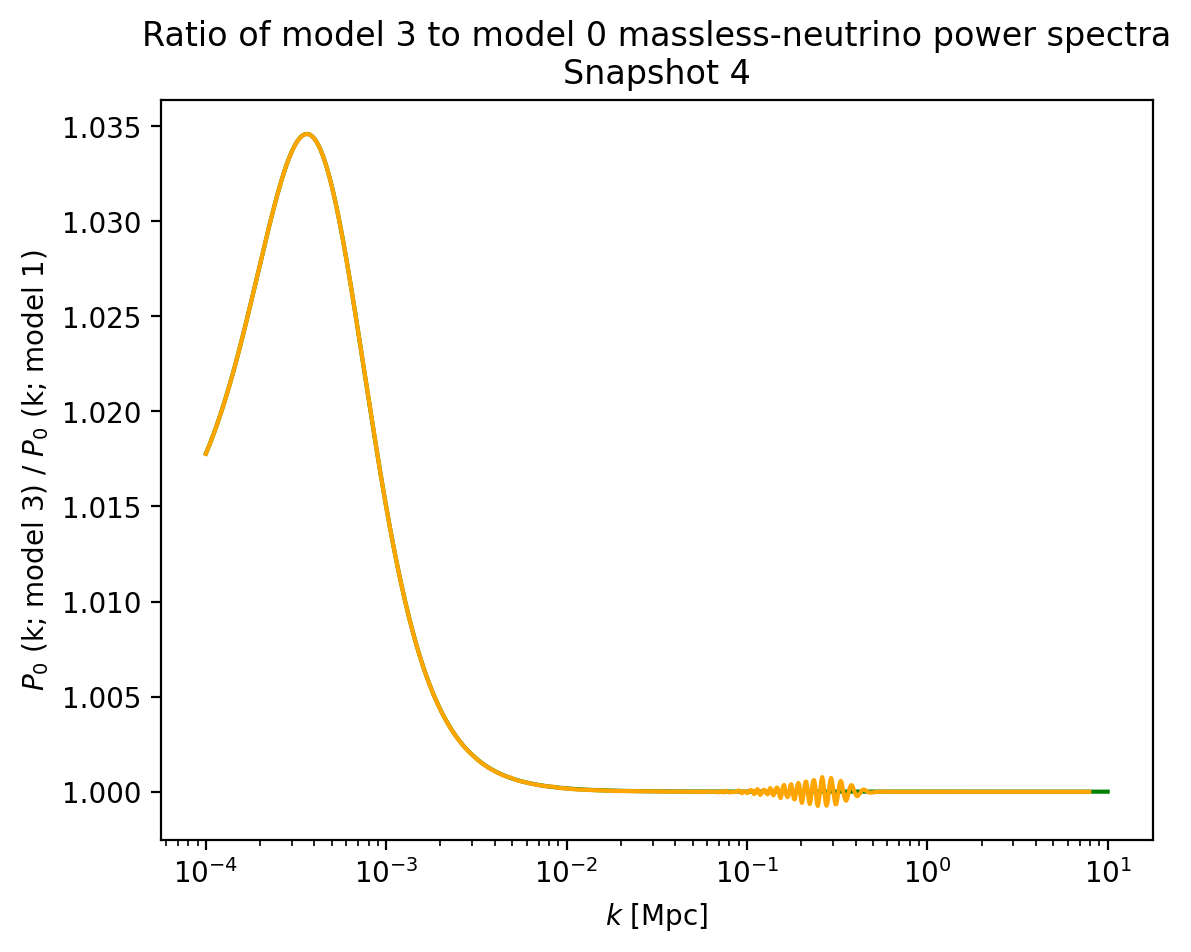

In [8]:
modeli = 3
snapi = 4

sim = spec_sims[onh2][0][snapi]
baseline_h = ci.cosm.loc[0]["h"]
baseline_k = sim["k"]
baseline_p = sim["P_no"]

sim = spec_sims[onh2][modeli][snapi]
this_h = ci.cosm.loc[modeli]["h"]
this_k = sim["k"]
this_p = sim["P_no"]

truncated_k, truncated_p, aligned_p = \
    utils.truncator(baseline_k, baseline_p, this_k, this_p)

plt.plot(truncated_k, aligned_p / truncated_p, c="green",
        label="Python wrapper")

true_baseline = powernu3[onh2_str][0][snapi]
true_this = powernu3[onh2_str][modeli][snapi]

#! I don't think we need to do interpolation, since they agree on h.
    # But in case anything weird happens I want to keep this in mind.
plt.plot(true_baseline["k"], true_this["P_no"] / true_baseline["P_no"],
         c="orange", label="ground truth")
plt.title("Ratio of model " + str(modeli) + " to model 0" + \
          " massless-neutrino power spectra\nSnapshot " + str(snapi))
plt.ylabel(r"$P_0$ (k; model " + str(modeli) + ") / $P_0$ (k; model 1)")
plt.xlabel(r"$k$ [Mpc]")
plt.xscale("log")

In [9]:
%%capture
fig, axs = plt.subplots()

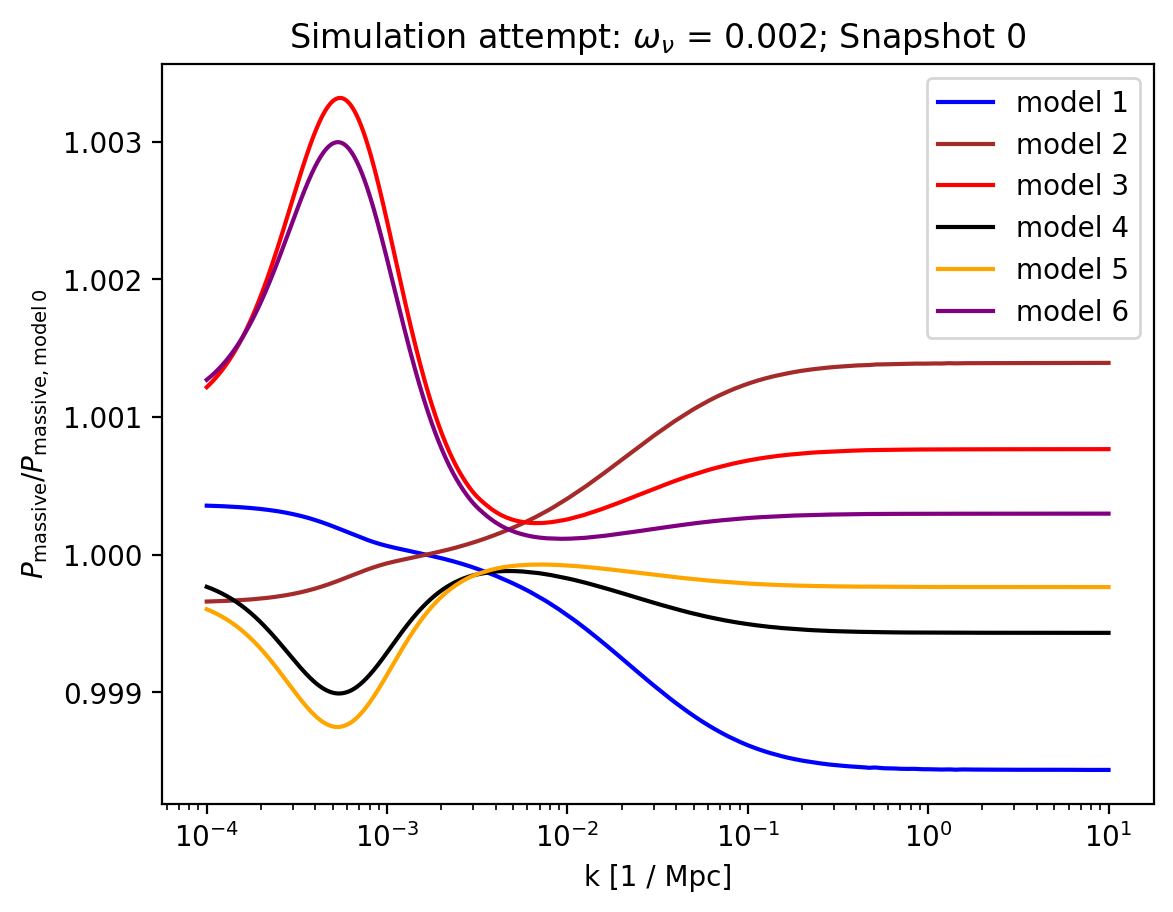

In [10]:
fig, axs = plt.subplots()
ci.model_ratios(0, spec_sims[onh2], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str, title="Simulation attempt");

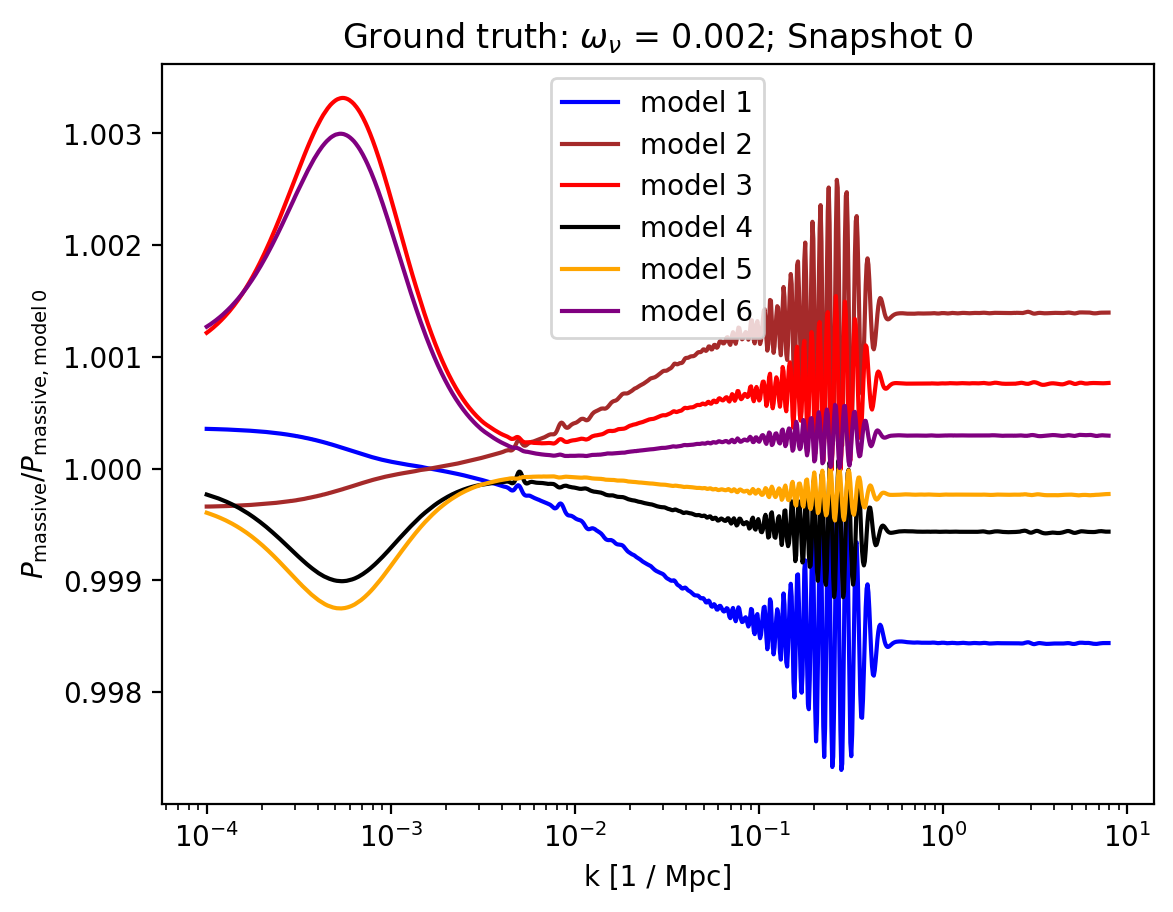

In [11]:
# What was this supposed to look like?
fig, axs = plt.subplots()
ci.model_ratios(0, powernu3[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str);

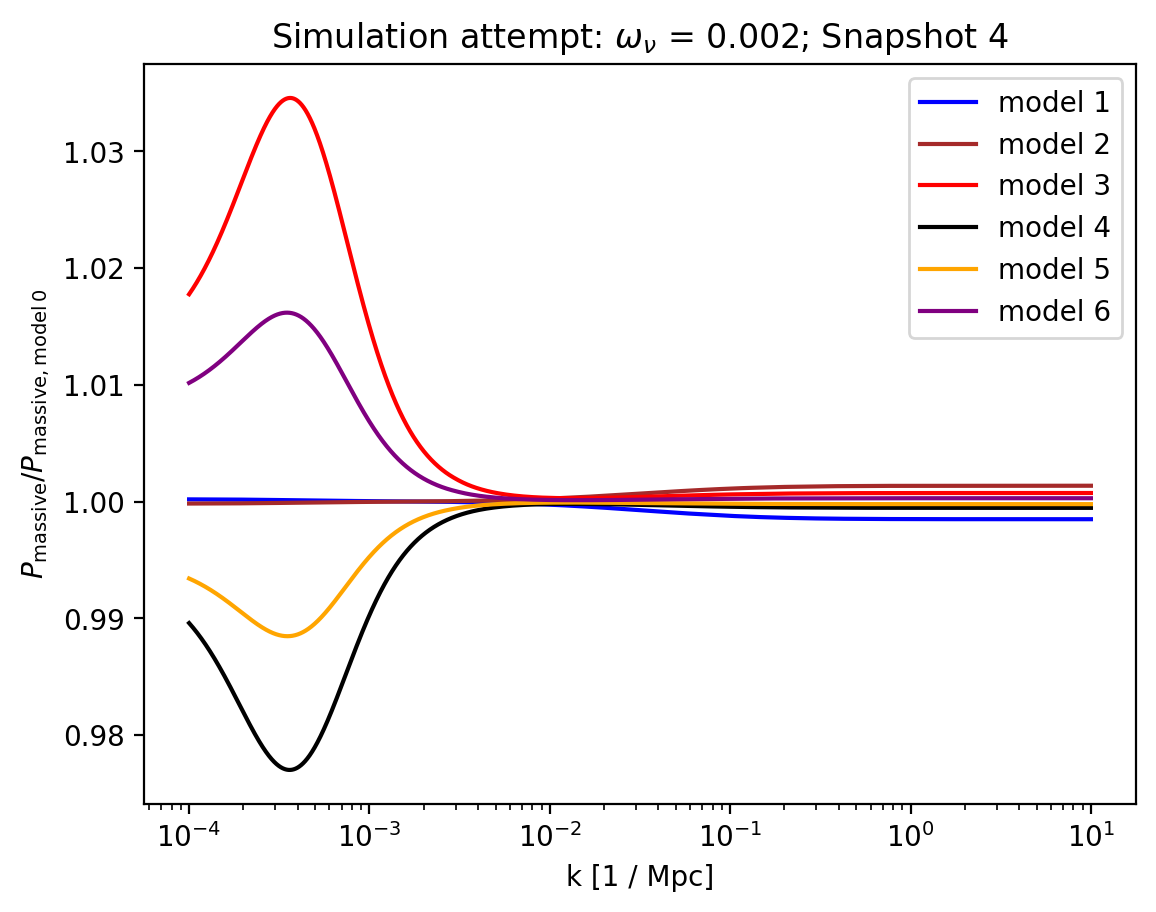

In [12]:
fig, axs = plt.subplots()
ci.model_ratios(
    4, spec_sims[onh2], axs, massive=True, skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt");

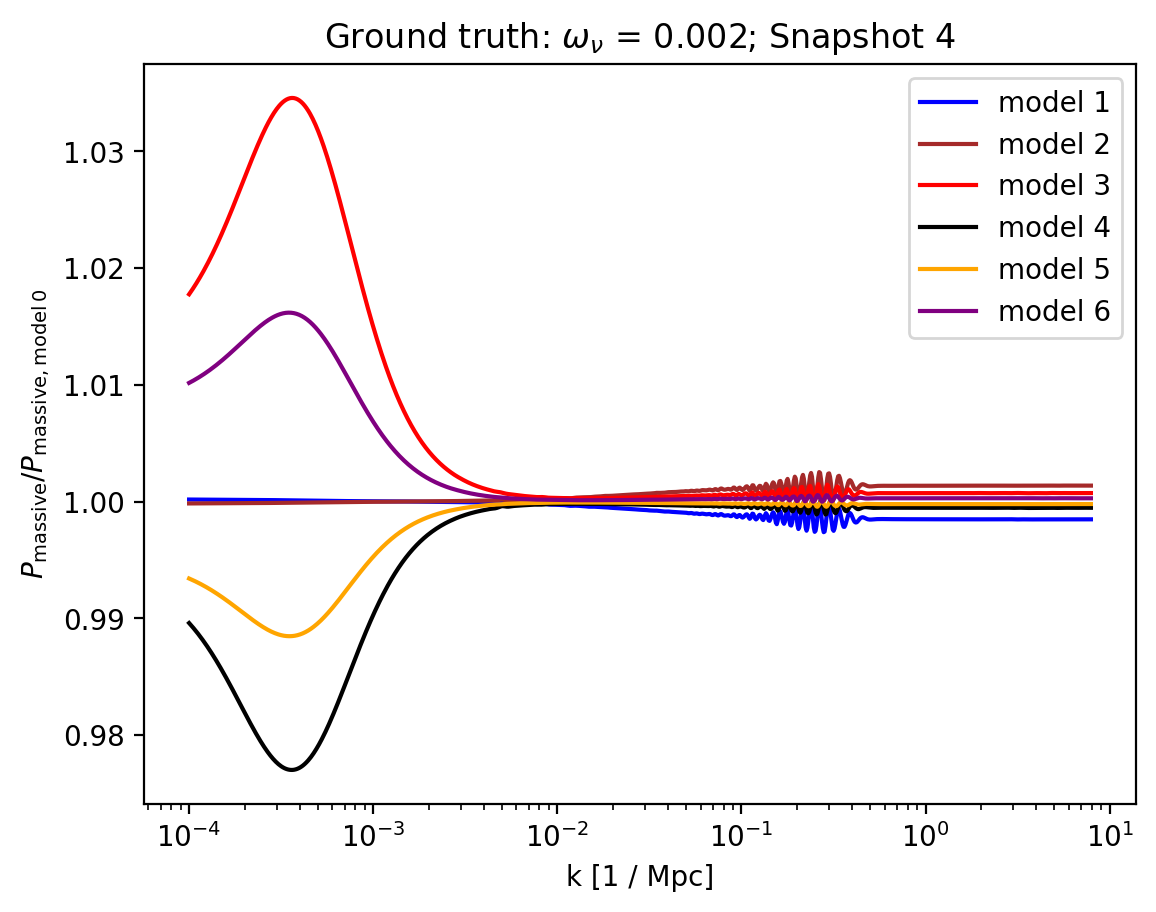

In [13]:
fig, axs = plt.subplots()
ci.model_ratios(4, powernu3[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str);

NameError: name 'k_massless_list' is not defined

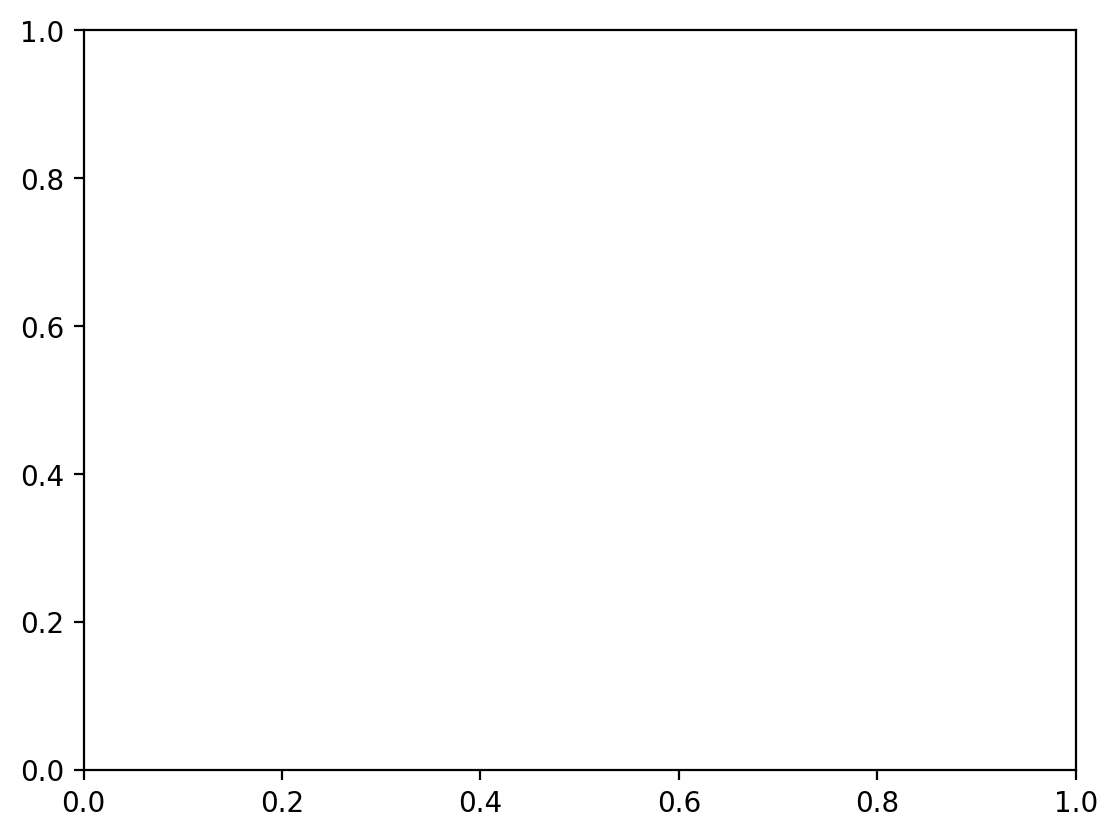

In [15]:
fig, axs = plt.subplots()
ci.model_ratios(
    k_massless_list, p_massless_list, 0, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", skips=[7, 8]);
ci.model_ratios(0, spec_sims[onh2], axs,
    massive=True, skips=[7, 8], title="Simulation attempt");

In [ ]:
fig, axs = plt.subplots()
ci.model_ratios(0, powernu3[onh2_str], axs,
    massive=False, skips=[7, 8], omnuh2_str=onh2_str);

In [ ]:
fig, axs = plt.subplots()
ci.model_ratios(
    4, spec_sims[onh2], axs, massive=False, skips=[7, 8],
    omnuh2_str=onh2_str,
    title="Simulation attempt");

In [ ]:
fig, axs = plt.subplots()
ci.model_ratios(4, powernu3[onh2_str], axs,
    massive=False, skips=[7, 8], omnuh2_str=onh2_str);

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(4, 2, sharex="col", sharey="row")
ci.model_ratios(
    0, spec_sims[onh2], axs, True, [7, 8], [0, 0], ['y'])
ci.model_ratios(0, powernu3[onh2_str], axs, True,
    [7, 8], [0, 1], []);
ci.model_ratios(
    4, spec_sims[onh2], axs, True, [7, 8], [1, 0], ['y'],
    title="Simulation attempt", omnuh2_str=onh2_str)
ci.model_ratios(4, powernu3[onh2_str], axs, True,
    [7, 8], [1, 1], []);
ci.model_ratios(
    0, spec_sims[onh2], axs, False, [7, 8], [2, 0], ['y'],
    title="Simulation attempt", omnuh2_str=onh2_str)
ci.model_ratios(0, powernu3[onh2_str], axs, False,
    [7, 8], [2, 1], []);
ci.model_ratios(
    4, spec_sims[onh2], axs, False, [7, 8], [3, 0], ['x', 'y'],
    title="Simulation attempt", omnuh2_str=onh2_str)
ci.model_ratios(4, powernu3[onh2_str], axs, False,
    [7, 8], [3, 1], ['x']);

In [ ]:
fig, axs = plt.subplots(4, 1, sharex="col", sharey="row")
ci.model_ratios_old(
    k_massive_list, p_massive_list, 0, axs, "massive",
    r"CAMB results: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], 0, ['y'])
ci.model_ratios_old(
    k_massive_list, p_massive_list, 4, axs, "massive",
    r"CAMB results: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], 1, ['y'])
ci.model_ratios_old(
    k_massless_list, p_massless_list, 0, axs, "massless",
    r"CAMB results: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], 2, ['y'])
ci.model_ratios_old(
    k_massless_list, p_massless_list, 4, axs, "massless",
    r"CAMB results: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], 3, ['x', 'y'])
plt.savefig("asymptote_overview.png")

In [ ]:
fig, axs = plt.subplots(4, 2, sharex="col", sharey="row")
ci.model_ratios_old(
    k_massive_list, p_massive_list, 0, axs, "massive",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], [0, 0], ['y'])
ci.model_ratios(0, powernu3[onh2_str], axs, True, [7, 8],
    [0, 1], []);
ci.model_ratios_old(
    k_massive_list, p_massive_list, 4, axs, "massive",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], [1, 0], ['y'])
ci.model_ratios(4, powernu3[onh2_str], axs, True, [7, 8],
    [1, 1], []);
ci.model_ratios_old(
    k_massless_list, p_massless_list, 0, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], [2, 0], ['y'])
ci.model_ratios(0, powernu3[onh2_str], axs, False, [7, 8],
    [2, 1], []);
ci.model_ratios_old(
    k_massless_list, p_massless_list, 4, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], [3, 0], ['x', 'y'])
ci.model_ratios(4, powernu3[onh2_str], axs, False, [7, 8],
    [3, 1], ['x']);

In [ ]:
fig, axs = plt.subplots(4, 1, sharex="col", sharey="row")
spectra.compare_wrappers(
    k_massive_list, p_massive_list, powernu3[onh2_str], 0, axs, True,
    "massive",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 0, ['y'])
spectra.compare_wrappers(
    k_massive_list, p_massive_list, powernu3[onh2_str], 4, axs, True,
    "massive",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 4", [7, 8], 1, ['y'])
spectra.compare_wrappers(
    k_massless_list, p_massless_list, powernu3[onh2_str], 0, axs, False,
    "massless",
    r"Comparison of simulation codes: massless neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 2, ['y'])
spectra.compare_wrappers(
    k_massless_list, p_massless_list, powernu3[onh2_str], 4, axs, False,
    "massless",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 3, ['x', 'y'])

In [ ]:
fig, axs = plt.subplots(4, 1, sharex="col", sharey="row")
spectra.compare_wrappers(
    k_massive_list, p_massive_list, spectra.powernu2, 0, axs, True,
    "massive",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 0, ['y'])
spectra.compare_wrappers(
    k_massive_list, p_massive_list, spectra.powernu2, 4, axs, True,
    "massive",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 4", [7, 8], 1, ['y'])
spectra.compare_wrappers(
    k_massless_list, p_massless_list, spectra.powernu2, 0, axs, False,
    "massless",
    r"Comparison of simulation codes: massless neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 2, ['y'])
spectra.compare_wrappers(
    k_massless_list, p_massless_list, spectra.powernu2, 4, axs, False,
    "massless",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 3, ['x', 'y'])

In [ ]:
x_list = []
for i in range(len(p_massive_list)):
    x_list.append(p_massive_list[i] / p_massless_list[i])

In [ ]:
fig, axs = plt.subplots(4, 1, sharex="col", sharey="row")
ci.model_ratios_old(
    k_massive_list, x_list, 0, axs, "",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], 0, ['y'], x_mode=True)
ci.model_ratios(0, powernu3[onh2_str], axs, 'x', [7, 8], 1,
    ['y'])
ci.model_ratios_old(
    k_massive_list, x_list, 4, axs, "",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], 2, ['y'], x_mode=True)
ci.model_ratios(4, powernu3[onh2_str], axs, 'x', [7, 8], 3,
    ['x', 'y'])

minmin = axs[0].get_ylim()[0]
maxmax = axs[0].get_ylim()[1]
for i in range(1, 4):
    ymin, ymax = axs[i].get_ylim()
    if ymin < minmin:
        minmin = ymin
    if ymax > maxmax:
        maxmax = ymax
        
for i in range(4):
    axs[i].set_ylim((minmin, maxmax))

In [ ]:
fig, axs = plt.subplots(2, 1, sharex="col", sharey="row")
spectra.compare_wrappers(k_massive_list, x_list, spectra.powernu2, 0, axs,
    'x', "",
    r"Comparison of simulation codes: $\omega_\nu$ = " + onh2_str + \
    "; Snapshot 0", [7, 8], 0, ['y'])
spectra.compare_wrappers(k_massive_list, x_list, spectra.powernu2, 4, axs,
    'x', "",
    r"Comparison of simulation codes: $\omega_\nu$ = " + onh2_str + \
    "; Snapshot 4", [7, 8], 1, ['x', 'y'])

## 